<a href="https://colab.research.google.com/github/Chrisduruh/-ChristianDuruh_lab2_myportfoliobackend/blob/main/robust_fit3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

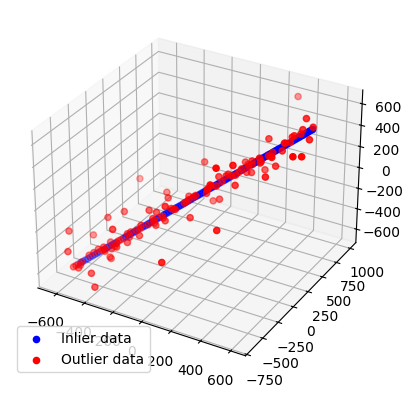

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import LineModelND, ransac

np.random.seed(seed=1)

# generate coordinates of line
point = np.array([0, 0, 0], dtype='float')
direction = np.array([1, 1, 1], dtype='float') / np.sqrt(3)
xyz = point + 10 * np.arange(-100, 100)[..., np.newaxis] * direction

# add gaussian noise to coordinates
noise = np.random.normal(size=xyz.shape)
xyz += 0.5 * noise
xyz[::2] += 20 * noise[::2]
xyz[::4] += 100 * noise[::4]

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(xyz, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
outliers = inliers == False

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[inliers][:, 0], xyz[inliers][:, 1], xyz[inliers][:, 2], c='b',
           marker='o', label='Inlier data')
ax.scatter(xyz[outliers][:, 0], xyz[outliers][:, 1], xyz[outliers][:, 2], c='r',
           marker='o', label='Outlier data')
ax.legend(loc='lower left')
plt.show()
